In [2]:
#Librerias
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.model_selection import train_test_split
import graphviz#1
from sklearn.tree import export_graphviz!#2
import matplotlib.pyplot as plt#3
import numpy as np#4
#Los enumerados son para que podamos graficar las desiciones que generemos

In [18]:
iris=load_iris()#Pasamos el set de datos a nuestra variable

In [19]:
X_entrena, X_test, y_entrena, y_test=train_test_split(iris.data, iris.target)
#Generamos 4 variables sobre el set de datos de iris

In [20]:
arbol=DecisionTreeClassifier()#A la variable arbol le pasamos el clasificador de arbol de desiciones

In [21]:
arbol.fit(X_entrena, y_entrena)#Entrenamiento del algoritmo
#Resultados de los parametros por default

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [7]:
arbol.score(X_test, y_test)#Que tan bien aprendio el algoritmo, para saber que tan bien ´puede generar predicciones

0.9736842105263158

In [22]:
arbol.score(X_entrena, y_entrena)#Dio el 100%, lo cual esta mal por lo que entendi, por algo llamado sobreajuste machine learning

1.0

In [23]:
#Usamos esta funcion para generar un archivo llamado arbol.dot que es la que contiene la informacion del arbol
export_graphviz(arbol, out_file='arbol.dot', class_names=iris.target_names,
                feature_names=iris.feature_names, impurity=False, filled=True)

#

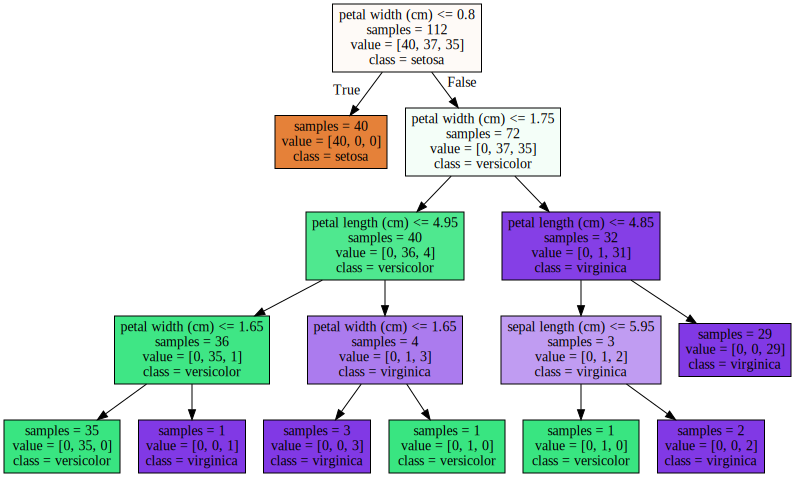

In [3]:
#Usamos esto para graficar el arbol de desiciones
with open('arbol.dot') as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)
#Por ejemplo si el ancho del petalo es menor a 0.8 cm: si es cierto es una setosa si no va viendo las demas ramas

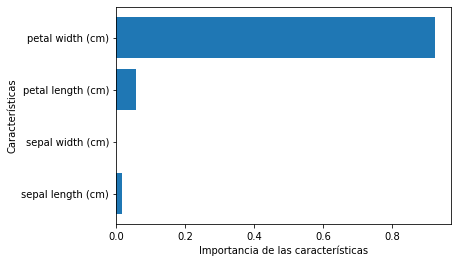

In [25]:
#grafico de barras
caract=iris.data.shape[1]
plt.barh(range(caract),arbol.feature_importances_)
plt.yticks(np.arange(caract),iris.feature_names)
plt.xlabel('Importancia de las características')
plt.ylabel('Características')
plt.show()
#Todo esto es para saber que tan importante es una caracteristica para ayudar a definir la clase a la cual pertenece
#La caracteristica que tiene mas importancia es el ancho del petalo

In [32]:
arbol=DecisionTreeClassifier(max_depth=3)#le cambiamos la profundidad para decirle cuantos niveles le vamos a permitir

In [33]:
arbol.fit(X_entrena, y_entrena)#Lo entrenemaos

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [35]:
print(arbol.score(X_test, y_test))#Testeamos, tiene un 97%

0.9736842105263158


In [36]:
print(arbol.score(X_entrena, y_entrena))#97%

0.9732142857142857


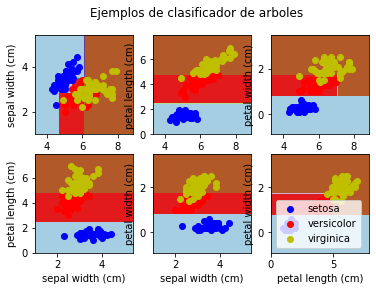

In [37]:
n_classes=3
plot_colors='bry'
plot_step=0.02

for pairidx, pair in enumerate([[0,1],[0,2],[0,3],
                               [1,2],[1,3],[2,3]]):
    X=iris.data[:,pair]
    y=iris.target
    
    #entrena algoritmo
    clf=DecisionTreeClassifier(max_depth=3).fit(X,y)#Le cambiamos la profundidad para que no haya sobreajuste con (max_depth=3)
    plt.subplot(2,3,pairidx + 1)
    
    x_min, x_max=X[:,0].min() - 1, X[:,0].max() +1
    y_min, y_max=X[:,1].min() - 1, X[:,1].max() +1
    xx, yy=np.meshgrid(np.arange(x_min, x_max, plot_step),
                       np.arange(y_min, y_max, plot_step))
    Z=clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z=Z.reshape(xx.shape)
    cs=plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    
    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis('tight')

    #plot puntos de entrenamiento
    for i, color in zip(range(n_classes), plot_colors):
        idx=np.where(y == i)
        plt.scatter(X[idx, 0], X[idx,1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.Paired)
    plt.axis('tight')

plt.suptitle('Ejemplos de clasificador de arboles')

plt.legend()
plt.show()
#todo esto es para poder graficar, como clasifico nuestro algoritmo